# Inicializar 

In [119]:
from deta import Deta  # pip install deta
from skimage.io import imread,imshow,imsave
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import database as D
import tensorflow as tf
import CAD_DLOv1 as cad
import database as D
import PIL
import cv2
import PIL
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json
#sys.path.insert(1, 'C:/Users/PIEROL/Desktop/DeepLearningOp/Streamlit')


In [89]:
DETA_KEY = "e0aeitf6_7Ez5rjjPeN12TfdyAbN34KdzT7Jse29P"

# Initialize with a project key
deta = Deta(DETA_KEY)

# This is how to create/connect a database
db = deta.Base("MetadataPACS")
dv = deta.Drive('DLO_prueba')
dbc = deta.Base('Cred')
dvg = deta.Drive('GradCam')

In [4]:
# serialize model to JSON
model_json = model.to_json()
model = model_from_json(loaded_model_json)

<class 'numpy.ndarray'>
255.0


c:\Users\PIEROL\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


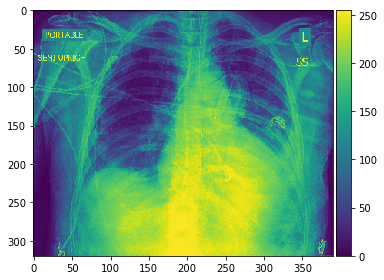

In [2]:
# Prueba Progragama
im = D.get_radiog('id_159350')
print(type(im))
print(np.amax(im))
imshow(im)

# FUNCIONES

In [21]:
# FUNCIONES DE LA BASE DE DATOS

def insert_met(id, name, age, te, r, id_neu, id_rad, aprob, diag, comments):
    """Returns the user on a successful user creation, otherwise raises and error"""
    return db.put({"key": id, "nombre": name, "edad": age, 'tipo_estudio' : te, 'razon': r,
    'id_neu':id_neu, 'id_rad': id_rad, 'aprob': aprob, 'diag': diag, 'comments': comments})


def get_met(period):
    """If not found, the function will return None"""
    return db.get(period)

# FUNCIONES DEL DRIVE

def upload(imname, file):
    # Subimos una Imagen
    return dv.put(name = imname, path =file)

def get_image(name):
    # Obtenemos una Imagen cuando la pedimos por el nombre
    return dv.get(name)

def list_images():
    # Lista de las Imágenes que guarda
    return dv.list()

# FUNCIONES DE LA BASE DE DATOS DE CREDENCIALES

def dbc_insert_met(id,us, pw, name, esp, fn):
    """Returns the user on a successful user creation, otherwise raises and error"""
    return dbc.put({"key": id, 'usuario': us, 'contra': pw,"nombre": name, 'especialidad' : esp, 'fecha_nac':fn})


def dbc_get_met(period):
    """If not found, the function will return None"""
    return dbc.get(period)

# Subir Info

In [66]:
# Ingresamos la metadata
id = 'id_159360'
nombre =  'Paolo Guerrero'
age = 41
te = 'Rayos X Pecho'
r = 'Pulmonía'
id_neu = 'id_0002'
id_rad = 'id_0002'
aprob = ''
diag = ''
com = ' '

#insert_met(id, nombre, age, te, r, id_neu,id_rad,aprob,diag,com)


In [165]:
# VICTOR TIENE QUE REVISAR ESTO

# Subimos la Imagen como txt
mpath = 'C:/Users/PIEROL/Downloads/Database_DLO'
im = imread(mpath + '/DS_DLO/Train/P/impos_1036058.png', as_gray = True)


print(im.shape)

# IMPORTANTE SUBIR AMBAS IMAGENES CON DIMENSION PAR
s = im.shape
# Identificamos si alguna dimension es impar
r0 = s[0] % 2
r1 = s[1] % 2
# Hacemos a las dimensiones pares si alguna no lo es
if (r0 == 1):
    im = im[0:s[0]-1,:]
if (r1 == 1):
    im = im[:,0:s[1]-1]
print(im.shape)

file = 'im.txt'
np.savetxt(file, im, fmt = '%.4e')
#upload(id, file)
#imshow(im)
os.remove('im.txt')


(320, 390)
(320, 390)


In [20]:
# Subimos la Imagen como txt
model_path = 'weights.h5'
pred, gradcam, spi = cad.DLO_predict(im, model_path)

display(gradcam)
id = 'id_0001'
def upload_gradcamtxt(id, gradcam):
    data = tf.keras.preprocessing.image.img_to_array(gradcam)
    data = np.transpose(data, (2,0,1))
    with open('test.txt', 'w') as outfile:
        outfile.write('# {0}\n'.format(data.shape))
        for data_slice in data:
            np.savetxt(outfile, data_slice, fmt='%.2f')
            # Writing out a break to indicate different slices...
            outfile.write('# New slice\n')
    f = open('test.txt', 'r')
    dvg.put(id, f)

upload_gradcamtxt(id,gradcam)

# Leemos solo la primer linea para obtener el shape
# with open('test.txt') as f: 
#     first_line = f.readline().strip('\n')
# s = first_line[2:] # Tupla con el tamaño final

# # 
# gc = np.loadtxt('test.txt')
# gc = gc.reshape(eval(s))
# gc = np.transpose(gc,(1,2,0)) # vuelve al original
# print(gc.shape)

# # xx1 = tf.keras.preprocessing.image.array_to_img(xx1)
# # print(xx1.size)
# # display(xx1)

KeyboardInterrupt: 

In [15]:
# Subimos la Imagen como txt
model_path = 'weights.h5'
pred, gradcam, spi = cad.DLO_predict(im, model_path)
D.upload_gradcamtxt('id_0001',spi)


# Lectura de Info

In [8]:
# Extraemos todos los nombres
res = db.fetch()
df = pd.DataFrame(res.items)
#display(df)

lst_names = list(df['nombre'])
print(lst_names)
display(df)

['Nicki Nicole', 'Lionel Messi', 'Federico Salazar', 'Alfonso Ugarte', 'Radamel Falcao', 'Shakira', 'Wade Wilson', 'Amanda Waller', 'Christian Dominguez', 'Christian Dominguez', 'Galarreta']


,edad,id_neu,id_rad,key,m_neumologo,m_radiologo,nombre,operario,razon,tipo_estudio,aprob,diag
0,23,id_0002,id_0003,id_159347,Duki,Mel Gibson,Nicki Nicole,Oc Brown,Hipoxia incontrolada,Rayos X Pecho,NaN,NaN
1,52,id_0001,id_0004,id_159348,Diego Maradona,Scaloni,Lionel Messi,Stephen Strange,Barotrauma,Rayos X Pecho,NaN,NaN
2,42,id_0001,id_0003,id_159349,Jorge Luna,Maria Palacios,Federico Salazar,Carlos Alcántara,Tuberculosis,Rayos X Pecho,NaN,NaN
3,56,id_0002,id_0004,id_159350,George Forsyth,Pedro Castillo,Alfonso Ugarte,Natalia Málaga,Neumococo,Rayos X Pecho,NaN,NaN
4,64,id_0001,id_0003,id_159351,La Paisana Jacinta,Kike Suero,Radamel Falcao,Abimael Guzmán,Diabetes,Rayos X Pecho,NaN,NaN
5,58,id_0001,id_0004,id_159352,Ricky Marin,Gerard Piqué,Shakira,Sebastian Yatra,Caderitis,Rayos X Pecho,NaN,NaN
6,19,id_0002,id_0004,id_159353,Peter Parker,Tony Stark,Wade Wilson,Bruce Banner,Adenocarcinoma Pulmón,Rayos X Pecho,NaN,NaN
7,54,id_0001,id_0004,id_159354,Clark Kent,Bruce Wayne,Amanda Waller,Martha Arkham,Esclerosis Multiple,Rayos X Pecho,NaN,NaN
8,35,id_0002,id_0003,id_159355,Roberto Martinez,Tilsa Lozano,Christian Dominguez,Tula Rodriguez,Infielidad Crónica,Rayos X Pecho,NaN,NaN
9,35,id_0001,id_0003,id_159356,Roberto Martinez,Tilsa Lozano,Christian Dominguez,Tula Rodriguez,Infielidad Crónica,Rayos X Pecho,NaN,NaN


In [10]:
#Subir la radiografía
iml = get_image('vic.txt')
content = iml.read().decode("utf-8") 
iml.close()

glst = []
content = content.replace('\r', '')
imlst = content.split('\n')
imlst = imlst[:320]

for lst in imlst:
    l = lst.split(' ')
    l = list(map(float, l))
    glst.append(l)

im = np.array(glst)
print(im.dtype)
print(im.shape)

plt.imshow(im, cmap = 'gray')

# binary_file = open("my_file.txt", "w")
# binary_file.write(content)
# binary_file.close() 



(320, 390, 3)


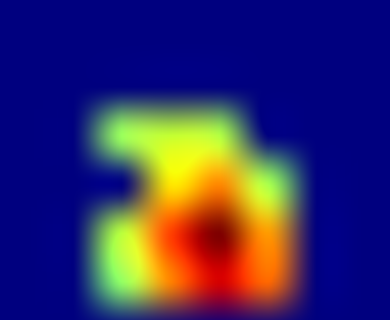

In [14]:
file = dvg.get('id_0001')
content = file.read().decode("utf-8") 
file.close()

imlst = content.split('\n')
imlst.pop()
s = imlst.pop(0)

i1 = imlst.index('# New slice')
l1 = imlst[:i1]
i2 = imlst[i1+1:].index('# New slice')
l2 = imlst[i1+1:i1+i2+1]
l3 = imlst[i1+i2+2:]
l3.pop()

for ll in [l1,l2,l3]:
    clst = []
    for li in ll:
        lst_i =  li.split(' ')
        lst_i = list(map(float,lst_i))
        clst.append(lst_i)  
    # x = np.array(clst)
    # print(x.shape)
    if ll is l1:
        x = np.array(clst)
    else:
        x = np.dstack([x, np.array(clst)])

print(x.shape)
display(PIL.Image.fromarray(np.uint8(x)))

(320, 390, 3)


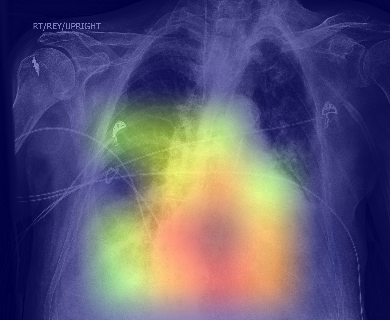

In [16]:
# Recuperar gradcam
x = D.get_gradcam('id_0001')
print(x.shape)
display(PIL.Image.fromarray(np.uint8(x)))

# Credenciales

In [8]:
id = 'id_0004'
user = 'saltes18'
pw = 'saltes123'
name = 'Fabio Calez'
esp = 'RADIOLOGO'
fn = '30/07/1970'

dbc_insert_met(id,user,pw,name,esp,fn)

{'contra': 'saltes123',
 'especialidad': 'RADIOLOGO',
 'fecha_nac': '30/07/1970',
 'key': 'id_0004',
 'nombre': 'Fabio Calez',
 'usuario': 'saltes18'}

In [9]:
# Extraemos todos los credenciales
res = dbc.fetch()
df = pd.DataFrame(res.items)
#display(df)
lst_us = list(df['usuario'])
print(lst_us)

# Extraer contraseña
pw = df[df['usuario'] == lst_us[0]]['contra']
print(pw.item)

['tarzan2010', 'goat2022', 'almendra2', 'saltes18']
<bound method IndexOpsMixin.item of 0    españabicampeon
Name: contra, dtype: object>


# Extra

390


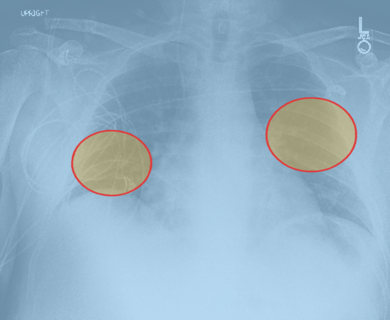

In [171]:
mpath = 'C:/Users/PIEROL/Downloads/Database_DLO'

bg = PIL.Image.open(mpath + '/DS_DLO/Train/P/impos_1036058.png').convert('RGB')
x = bg.size
print(x[0])
bg = bg.resize((600,600))
#fg0 = PIL.Image.open('lblue.png')
fg0 = PIL.Image.new(mode = 'RGBA', size(600,600), color = 'green')
fg0.putalpha(128)
fg = PIL.Image.open('imgX.png')

bg.paste(fg0, (0,0), fg0)
bg.paste(fg, (0,0), fg)
#bg.show()

bg = bg.resize((390,320))

display(bg)